# Matching Resumes to Jobs using Key Skills

In this section, we will match CVs with respective skills needed. This is an alternative to the cosine similarity method where you focus more precisely on the content. 

Note: the code is not scalable in this shape and form, and I have done it for 10 CVs only (same as for the other trial). As a follow up I will focus on conducting these functions in a smarter way :)


# Import required libraries


In [1]:
import PyPDF2
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import docx2txt

from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.text import Text
import docx2txt

# Job requirements

Here we have again used the Data Analyst role job description.(https://careers.getyourguide.com/positions/engineering/data-analyst-business-analytics/berlin/) 

* In a separate notebook, you can see the different functions and pre-processing I have done to extract key words (NLTK, topic modeling with LDA, RAKE (Rapid Automatic Keyword Extraction), Gensim library)- please check out "Job Description Pre-Processing" notebook. 
* None of the models worked well (more explained in the other notebook) due to extracting key words rather than specific skills. This can be handled by other models (e.g. CSO classifier, corpus and various libraries). I lost many hours trying to download CSO classifier (https://pypi.org/project/cso-classifier/), in the end it didn't work out (it even broke my python so had to re-install all packages....) and at this point, I did not have time to explore this further.
* Thus, I have used CSO-classifier to outline skills in the job description + manually added more. Hence, a dataset has been created= "DA_skills.csv"

Sources: 
* https://cso.kmi.open.ac.uk/home for other similar words
* https://data.world/peopledatalabs/similar-skills-28935-unique-skills/workspace/query?filename=cleaned_related_skills.json&newQueryType=SQL&selectedTable=cleaned_related_skills&tempId=1608045714973 for similar words, using the SQL function due to the file being too big
* https://cso.kmi.open.ac.uk/classify/ to classify the job description-> this can be done by downloading the package in Python, but I couldn't download it. 

Note: the csv file is in github, I used it as a dictionary here. 


In [24]:
# Create dictionary with key skills needed for the job and similary expressions (from the data DA_skills.csv)

skills = {'Data Analytics':['business analytics','quantitative analysis','data reporting','qualitative analysis',
                              'customer analysis','programming','coding','data','database','data mining','data science',
                           'busines intelligence','analytics','marketing mix modeling','database','data analysis','data structures',
                           'data modeling', 'deep learning' ],      
        'Statistics':['hypothesis test','statistical models','statistics','prediction','forecasting','machine learning',
                                 'statistical consulting','logistical regression','bayesian statistics','probability','variance analysis','hypothesis testing',
                                 'ab testing','predictive analytics','predictive modeling'],
        'Big Data':['big data','Spark','Hive','datasets','big datasets','hadoop','cloudera','mapreduce','impala',
                        'sqoop'],
        'Data Visualisation':['dashboards','reports','metrics','storytelling','KPI','KPIs', 'visualisation'],
        'Data Tools':['Looker','Jupyter Notebook','aws','sql','nosql','nlp','python','r','mysql','tableau','numpy',
                          'pandas','matplotlib','scipy','nltk','sklearn'],
        'Problem Solving':['problem solving','solution-oriented','problem analysis','analytical','detailed','systematic','logical', 'organisational skills'],
        'Customer Centricity':['csat', 'user behaviour', 'customer', 'customer centricity', 'user experience', 'customers', 'customer service', 'usability', 'prototyping'],
        'Agile':['independent', 'autonomous', 'adaptability', 'flexibility', 'agile', 'curiosity', 'open minded', 'perseverance', 'stamina'],
        'Communication Skills':['communication skills', 'interpersonal skils', 'presentation skills', 'communication', 'written communication']}

The rest to be continued after processing the CVs. 

# CV1

In [25]:
#load CV1
CV1=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 1.docx")

#remove punctuation+ lowercase
text1 = nltk.word_tokenize(CV1)
text1=[word.lower() for word in text1 if word.isalpha()]
print(text1)

# An empty list to store scores for the CV
scores1 = []

['zoe', 'zhang', 'xiaming', 'profile', 'my', 'personal', 'qualities', 'and', 'beliefs', 'make', 'me', 'an', 'ideal', 'person', 'for', 'the', 'accounting', 'profession', 'i', 'am', 'honest', 'able', 'to', 'learn', 'quickly', 'and', 'work', 'well', 'under', 'stress', 'environments', 'particularly', 'i', 'possess', 'a', 'strong', 'sense', 'of', 'responsibility', 'an', 'analytical', 'mind', 'an', 'eye', 'for', 'details', 'and', 'good', 'communication', 'and', 'interpersonal', 'skills', 'personal', 'details', 'mobile', 'email', 'zxmxm', 'place', 'of', 'living', 'block', 'kim', 'tian', 'road', 'near', 'tiong', 'bahru', 'mrt', 'nationality', 'china', 'singapore', 'pr', 'since', 'date', 'of', 'birth', 'march', 'marital', 'status', 'single', 'education', 'acca', 'qualification', 'fully', 'completed', 'in', 'placing', 'in', 'singapore', 'on', 'paper', 'advanced', 'financial', 'management', 'bachelor', 'of', 'science', 'with', 'first', 'class', 'honours', 'in', 'applied', 'accounting', 'from', 'o

In [26]:
#Score counters for each area
analytics1 = 0
statistics1 = 0
bigdata1 = 0
dataviz1 = 0
datatools1 = 0
problemsolving1 = 0
customers1 = 0
agile1 = 0
communication1= 0

In [27]:
# Obtain the scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text1:
                analytics1 +=1
        scores1.append(analytics1)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text1:
                statistics1 +=1
        scores1.append(statistics1)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text1:
                bigdata1 +=1
        scores1.append(bigdata1)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text1:
                dataviz1 +=1
        scores1.append(dataviz1)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text1:
                datatools1 +=1
        scores1.append(datatools1)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text1:
                problemsolving1 +=1
        scores1.append(problemsolving1)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text1:
                customers1 +=1
        scores1.append(customers1)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text1:
                agile1 +=1
        scores1.append(agile1)
        
    else:
        for word in skills[area]:
            if word in text1:
                communication1 +=1
        scores1.append(communication1)

In [28]:
#dataframe with the outcome
result1 = pd.DataFrame(scores1,index=skills.keys(),columns=['CV1']).sort_values(by='CV1',ascending=False)
result1

,CV1
Statistics,2
Data Analytics,1
Data Visualisation,1
Problem Solving,1
Customer Centricity,1
Communication Skills,1
Big Data,0
Data Tools,0
Agile,0


# CV2

In [29]:
#load CV
CV2=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 2.docx")

#remove punctuation+ lowercase
text2 = nltk.word_tokenize(CV2)
text2=[word.lower() for word in text2 if word.isalpha()]
print(text2)

# An empty list to store scores for the CV
scores2 = []

['chew', 'wei', 'yuen', 'dave', 'linkedin', 'link', 'address', 'blk', 'lorong', 'toa', 'payoh', 'singapore', 'hp', 'email', 'nationality', 'malaysian', 'singapore', 'pr', 'profile', 'i', 'am', 'a', 'professional', 'qualified', 'accountant', 'trained', 'with', 'big', 'specialized', 'in', 'financial', 'services', 'covering', 'asset', 'management', 'and', 'banking', 'my', 'past', 'experiences', 'developed', 'me', 'to', 'be', 'an', 'optimistic', 'and', 'analytical', 'individual', 'with', 'strong', 'interpersonal', 'skills', 'and', 'work', 'best', 'as', 'a', 'team', 'leader', 'and', 'player', 'my', 'career', 'passion', 'is', 'to', 'build', 'a', 'long', 'term', 'and', 'rewarding', 'career', 'in', 'fast', 'pace', 'moving', 'industry', 'professional', 'qualification', 'april', 'present', 'cpa', 'australia', 'cpa', 'member', 'membership', 'no', 'completed', 'professional', 'papers', 'sept', 'present', 'malaysian', 'institute', 'of', 'accountants', 'chartered', 'accountant', 'membership', 'no', 

In [30]:
#Score counters for each area
analytics2 = 0
statistics2 = 0
bigdata2 = 0
dataviz2 = 0
datatools2 = 0
problemsolving2 = 0
customers2 = 0
agile2 = 0
communication2= 0

In [31]:
# Obtain the scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text2:
                analytics2 +=1
        scores2.append(analytics2)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text2:
                statistics2 +=1
        scores2.append(statistics2)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text2:
                bigdata2 +=1
        scores2.append(bigdata2)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text2:
                dataviz2 +=1
        scores2.append(dataviz2)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text2:
                datatools2 +=1
        scores2.append(datatools2)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text2:
                problemsolving2 +=1
        scores2.append(problemsolving2)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text2:
                customers2 +=1
        scores2.append(customers2)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text2:
                agile2 +=1
        scores2.append(agile2)
        
    else:
        for word in skills[area]:
            if word in text2:
                communication2 +=1
        scores2.append(communication2)
        
#dataframe with the outcome
result2 = pd.DataFrame(scores2,index=skills.keys(),columns=['CV2']).sort_values(by='CV2',ascending=False)
result2

,CV2
Data Analytics,1
Statistics,1
Data Visualisation,1
Problem Solving,1
Communication Skills,1
Big Data,0
Data Tools,0
Customer Centricity,0
Agile,0


# CV3

In [32]:
#load CV
CV3=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 3.docx")

#remove punctuation+ lowercase
text3 = nltk.word_tokenize(CV3)
text3=[word.lower() for word in text3 if word.isalpha()]

# An empty list to store scores for the CV
scores3 = []

#Score counters for each area
analytics3 = 0
statistics3 = 0
bigdata3 = 0
dataviz3 = 0
datatools3 = 0
problemsolving3 = 0
customers3 = 0
agile3 = 0
communication3= 0

# Scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text3:
                analytics3 +=1
        scores3.append(analytics3)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text3:
                statistics3 +=1
        scores3.append(statistics3)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text3:
                bigdata3 +=1
        scores3.append(bigdata3)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text3:
                dataviz3 +=1
        scores3.append(dataviz3)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text3:
                datatools3 +=1
        scores3.append(datatools3)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text3:
                problemsolving3 +=1
        scores3.append(problemsolving3)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text3:
                customers3 +=1
        scores3.append(customers3)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text3:
                agile3 +=1
        scores3.append(agile3)
        
    else:
        for word in skills[area]:
            if word in text3:
                communication3 +=1
        scores3.append(communication3)
        
#dataframe with the outcome
result3 = pd.DataFrame(scores3,index=skills.keys(),columns=['CV3']).sort_values(by='CV3',ascending=False)
result3

,CV3
Problem Solving,1
Agile,1
Communication Skills,1
Data Analytics,0
Statistics,0
Big Data,0
Data Visualisation,0
Data Tools,0
Customer Centricity,0


# CV4

In [33]:
#load CV
CV4=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 4.docx")

#remove punctuation+ lowercase
text4 = nltk.word_tokenize(CV4)
text4=[word.lower() for word in text4 if word.isalpha()]

# An empty list to store scores for the CV
scores4 = []

#Score counters for each area
analytics4 = 0
statistics4 = 0
bigdata4 = 0
dataviz4 = 0
datatools4 = 0
problemsolving4 = 0
customers4 = 0
agile4 = 0
communication4= 0

# Scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text4:
                analytics4 +=1
        scores4.append(analytics4)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text4:
                statistics4 +=1
        scores4.append(statistics4)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text4:
                bigdata4 +=1
        scores4.append(bigdata4)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text4:
                dataviz4 +=1
        scores4.append(dataviz4)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text4:
                datatools4 +=1
        scores4.append(datatools4)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text4:
                problemsolving4 +=1
        scores4.append(problemsolving4)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text4:
                customers4 +=1
        scores4.append(customers4)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text4:
                agile4 +=1
        scores4.append(agile4)
        
    else:
        for word in skills[area]:
            if word in text4:
                communication4 +=1
        scores4.append(communication4)
        
#dataframe with the outcome
result4 = pd.DataFrame(scores4,index=skills.keys(),columns=['CV4']).sort_values(by='CV4',ascending=False)
result4

,CV4
Data Visualisation,1
Data Tools,1
Customer Centricity,1
Data Analytics,0
Statistics,0
Big Data,0
Problem Solving,0
Agile,0
Communication Skills,0


# CV5

In [34]:
#load CV
CV5=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 5.docx")

#remove punctuation+ lowercase
text5 = nltk.word_tokenize(CV5)
text5=[word.lower() for word in text5 if word.isalpha()]

# An empty list to store scores for the CV
scores5 = []

#Score counters for each area
analytics5 = 0
statistics5 = 0
bigdata5 = 0
dataviz5 = 0
datatools5 = 0
problemsolving5 = 0
customers5 = 0
agile5 = 0
communication5= 0

# Scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text5:
                analytics5 +=1
        scores5.append(analytics5)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text5:
                statistics5 +=1
        scores5.append(statistics5)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text5:
                bigdata5 +=1
        scores5.append(bigdata5)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text5:
                dataviz5 +=1
        scores5.append(dataviz5)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text5:
                datatools5 +=1
        scores5.append(datatools5)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text5:
                problemsolving5 +=1
        scores5.append(problemsolving5)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text5:
                customers5 +=1
        scores5.append(customers5)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text5:
                agile5 +=1
        scores5.append(agile5)
        
    else:
        for word in skills[area]:
            if word in text5:
                communication5 +=1
        scores5.append(communication5)
        
#dataframe with the outcome
result5 = pd.DataFrame(scores5,index=skills.keys(),columns=['CV5']).sort_values(by='CV5',ascending=False)
result5

,CV5
Problem Solving,1
Data Analytics,0
Statistics,0
Big Data,0
Data Visualisation,0
Data Tools,0
Customer Centricity,0
Agile,0
Communication Skills,0


# CV 6

In [35]:
#load CV
CV6=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 6.docx")

#remove punctuation+ lowercase
text6 = nltk.word_tokenize(CV6)
text6=[word.lower() for word in text6 if word.isalpha()]

# An empty list to store scores for the CV
scores6 = []

#Score counters for each area
analytics6 = 0
statistics6 = 0
bigdata6 = 0
dataviz6 = 0
datatools6 = 0
problemsolving6 = 0
customers6 = 0
agile6 = 0
communication6= 0

# Scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text6:
                analytics6 +=1
        scores6.append(analytics6)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text6:
                statistics6 +=1
        scores6.append(statistics6)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text6:
                bigdata6 +=1
        scores6.append(bigdata6)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text6:
                dataviz6 +=1
        scores6.append(dataviz6)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text6:
                datatools6 +=1
        scores6.append(datatools6)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text6:
                problemsolving6 +=1
        scores6.append(problemsolving6)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text6:
                customers6 +=1
        scores6.append(customers6)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text6:
                agile6 +=1
        scores6.append(agile6)
        
    else:
        for word in skills[area]:
            if word in text6:
                communication6 +=1
        scores6.append(communication6)
        
#dataframe with the outcome
result6 = pd.DataFrame(scores6,index=skills.keys(),columns=['CV6']).sort_values(by='CV6',ascending=False)
result6

,CV6
Data Analytics,5
Data Visualisation,3
Data Tools,2
Problem Solving,2
Customer Centricity,1
Agile,1
Communication Skills,1
Statistics,0
Big Data,0


# CV 7

In [36]:
#load CV
CV7=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 7.docx")

#remove punctuation+ lowercase
text7 = nltk.word_tokenize(CV7)
text7=[word.lower() for word in text7 if word.isalpha()]

# An empty list to store scores for the CV
scores7 = []

#Score counters for each area
analytics7 = 0
statistics7 = 0
bigdata7 = 0
dataviz7 = 0
datatools7 = 0
problemsolving7 = 0
customers7 = 0
agile7 = 0
communication7= 0

# Scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text7:
                analytics7 +=1
        scores7.append(analytics7)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text7:
                statistics7 +=1
        scores7.append(statistics7)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text7:
                bigdata7 +=1
        scores7.append(bigdata7)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text7:
                dataviz7 +=1
        scores7.append(dataviz7)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text7:
                datatools7 +=1
        scores7.append(datatools7)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text7:
                problemsolving7 +=1
        scores7.append(problemsolving7)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text7:
                customers7 +=1
        scores7.append(customers7)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text7:
                agile7 +=1
        scores7.append(agile7)
        
    else:
        for word in skills[area]:
            if word in text7:
                communication7 +=1
        scores7.append(communication7)
        
#dataframe with the outcome
result7 = pd.DataFrame(scores7,index=skills.keys(),columns=['CV7']).sort_values(by='CV7',ascending=False)
result7

,CV7
Data Analytics,3
Data Tools,2
Data Visualisation,1
Statistics,0
Big Data,0
Problem Solving,0
Customer Centricity,0
Agile,0
Communication Skills,0


# CV 8

In [37]:
#load CV
CV8=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 8.docx")

#remove punctuation+ lowercase
text8 = nltk.word_tokenize(CV8)
text8=[word.lower() for word in text8 if word.isalpha()]

# An empty list to store scores for the CV
scores8 = []

#Score counters for each area
analytics8 = 0
statistics8 = 0
bigdata8 = 0
dataviz8 = 0
datatools8 = 0
problemsolving8 = 0
customers8 = 0
agile8 = 0
communication8= 0

# Scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text8:
                analytics8 +=1
        scores8.append(analytics8)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text8:
                statistics8 +=1
        scores8.append(statistics8)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text8:
                bigdata8 +=1
        scores8.append(bigdata8)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text8:
                dataviz8 +=1
        scores8.append(dataviz8)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text8:
                datatools8 +=1
        scores8.append(datatools8)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text8:
                problemsolving8 +=1
        scores8.append(problemsolving8)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text8:
                customers8 +=1
        scores8.append(customers8)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text8:
                agile8 +=1
        scores8.append(agile8)
        
    else:
        for word in skills[area]:
            if word in text8:
                communication8 +=1
        scores8.append(communication8)
        
#dataframe with the outcome
result8 = pd.DataFrame(scores8,index=skills.keys(),columns=['CV8']).sort_values(by='CV8',ascending=False)
result8

,CV8
Data Analytics,1
Data Visualisation,1
Customer Centricity,1
Statistics,0
Big Data,0
Data Tools,0
Problem Solving,0
Agile,0
Communication Skills,0


# CV 9

In [38]:
#load CV1
CV9=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 9.docx")

#remove punctuation+ lowercase
text9 = nltk.word_tokenize(CV9)
text9=[word.lower() for word in text9 if word.isalpha()]

# An empty list to store scores for the CV
scores9 = []

#Score counters for each area
analytics9 = 0
statistics9 = 0
bigdata9 = 0
dataviz9 = 0
datatools9 = 0
problemsolving9 = 0
customers9 = 0
agile9 = 0
communication9= 0

# Scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text9:
                analytics9 +=1
        scores9.append(analytics9)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text9:
                statistics9 +=1
        scores9.append(statistics9)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text9:
                bigdata9 +=1
        scores9.append(bigdata9)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text9:
                dataviz9 +=1
        scores9.append(dataviz9)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text9:
                datatools9 +=1
        scores9.append(datatools9)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text9:
                problemsolving9 +=1
        scores9.append(problemsolving9)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text9:
                customers9 +=1
        scores9.append(customers9)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text9:
                agile9 +=1
        scores9.append(agile9)
        
    else:
        for word in skills[area]:
            if word in text9:
                communication9 +=1
        scores9.append(communication9)
        
#dataframe with the outcome
result9 = pd.DataFrame(scores9,index=skills.keys(),columns=['CV9']).sort_values(by='CV9',ascending=False)
result9

,CV9
Data Analytics,1
Statistics,1
Problem Solving,1
Big Data,0
Data Visualisation,0
Data Tools,0
Customer Centricity,0
Agile,0
Communication Skills,0


# CV 10 

In [39]:
#load CV
CV10=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/CV_Project/CV 10.docx")

#remove punctuation+ lowercase
text10 = nltk.word_tokenize(CV10)
text10=[word.lower() for word in text10 if word.isalpha()]

# An empty list to store scores for the CV
scores10 = []

#Score counters for each area
analytics10 = 0
statistics10 = 0
bigdata10 = 0
dataviz10 = 0
datatools10 = 0
problemsolving10 = 0
customers10 = 0
agile10 = 0
communication10= 0

# Scores for each area
for area in skills.keys():
        
    if area == 'Data Analytics':
        for word in skills[area]:
            if word in text10:
                analytics10 +=1
        scores10.append(analytics10)
        
    elif area == 'Statistics':
        for word in skills[area]:
            if word in text10:
                statistics10 +=1
        scores10.append(statistics10)
        
    elif area == 'Big Data':
        for word in skills[area]:
            if word in text10:
                bigdata10 +=1
        scores10.append(bigdata10)
        
    elif area == 'Data Visualisation':
        for word in skills[area]:
            if word in text10:
                dataviz10 +=1
        scores10.append(dataviz10)
        
    elif area == 'Data Tools':
        for word in skills[area]:
            if word in text10:
                datatools10 +=1
        scores10.append(datatools10)
        
    elif area == 'Problem Solving':
        for word in skills[area]:
            if word in text10:
                problemsolving10 +=1
        scores10.append(problemsolving10)
 
    elif area == 'Customer Centricity':
        for word in skills[area]:
            if word in text10:
                customers10 +=1
        scores10.append(customers10)
        
    elif area == 'Agile':
        for word in skills[area]:
            if word in text10:
                agile10 +=1
        scores10.append(agile10)
        
    else:
        for word in skills[area]:
            if word in text10:
                communication10 +=1
        scores10.append(communication10)
        
#dataframe with the outcome
result10 = pd.DataFrame(scores9,index=skills.keys(),columns=['CV10']).sort_values(by='CV10',ascending=False)
result10

,CV10
Data Analytics,1
Statistics,1
Problem Solving,1
Big Data,0
Data Visualisation,0
Data Tools,0
Customer Centricity,0
Agile,0
Communication Skills,0


# Merging it all together

In [41]:
final=result1.join(result2)

In [42]:
final

,CV1,CV2
Statistics,2,1
Data Analytics,1,1
Data Visualisation,1,1
Problem Solving,1,1
Customer Centricity,1,0
Communication Skills,1,1
Big Data,0,0
Data Tools,0,0
Agile,0,0


In [46]:

final=final.join(result4)
final=final.join(result5)
final=final.join(result6)
final=final.join(result7)
final=final.join(result8)
final=final.join(result9)
final=final.join(result10)

In [47]:
final

,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8,CV9,CV10
Statistics,2,1,0,0,0,0,0,0,1,1
Data Analytics,1,1,0,0,0,5,3,1,1,1
Data Visualisation,1,1,0,1,0,3,1,1,0,0
Problem Solving,1,1,1,0,1,2,0,0,1,1
Customer Centricity,1,0,0,1,0,1,0,1,0,0
Communication Skills,1,1,1,0,0,1,0,0,0,0
Big Data,0,0,0,0,0,0,0,0,0,0
Data Tools,0,0,0,1,0,2,2,0,0,0
Agile,0,0,1,0,0,1,0,0,0,0


In [48]:
final['Skills'] = final.index

In [51]:
final

,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8,CV9,CV10,Skills
Statistics,2,1,0,0,0,0,0,0,1,1,Statistics
Data Analytics,1,1,0,0,0,5,3,1,1,1,Data Analytics
Data Visualisation,1,1,0,1,0,3,1,1,0,0,Data Visualisation
Problem Solving,1,1,1,0,1,2,0,0,1,1,Problem Solving
Customer Centricity,1,0,0,1,0,1,0,1,0,0,Customer Centricity
Communication Skills,1,1,1,0,0,1,0,0,0,0,Communication Skills
Big Data,0,0,0,0,0,0,0,0,0,0,Big Data
Data Tools,0,0,0,1,0,2,2,0,0,0,Data Tools
Agile,0,0,1,0,0,1,0,0,0,0,Agile


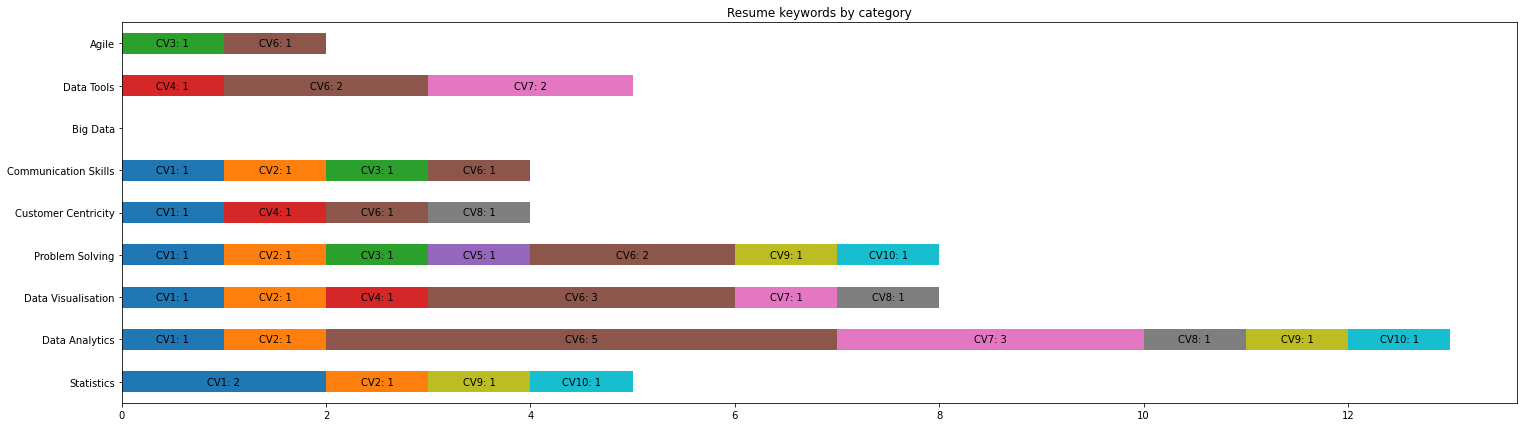

In [54]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = final.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in final.columns:
    for i in final.index:
        label = str(j)+": " + str(final.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()


The rest will be done in Tableaaaaau :) 

In [56]:
final.to_csv('skills_CV_matching.csv')